# Project 2, 001 #
<ol>
  <li>The filter types to be designed and characterized are:
    <ol>
      <li>Butterworth filter.</li>
      <li>Chebyshev type I filter.</li>
      <li>&quot;Brickwall&quot; filter (truncated sinc impulse response)
        with windowing.</li>
    </ol>    
    <p>Design each of the filters (using the scipy.filter module as
      necessary) at different cutoff frequencies, characterize their
      unit impulse response in the time domain, and their magnitude,
        phase and group delay responses in the frequency domain.</p>
    <p>Parameters to use for the filters:</p>
    <ul>
      <li>Sampling frequency Fs of 8000 Hz.</li>
      <li>Lowpass filters with cutoff frequencies (-3 dB) of fL = 50,
        100 Hz and passband ripple of 3 dB or less.</li>
      <li>Stopband attenuation of lowpass filters of -40 dB or better.</li>
      <li>Transition band width from passband to stopband 50% of fL or better.</li>
    </ul>
  </li>
  <li>Generate binary polar PAM signals from the ASCII text &quot;The quick
    brown fox jumps over the lazy dog 0123456789!&quot;
    <p>Parameters to use for the PAM signals:</p>
    <ol>
      <li>Sampling frequency Fs of 8000 Hz.</li>
      <li>Baud rate FB of 100 baud.</li>
      <li>PAM pulse p(t) of type 'rect' and type 'sinc' (with Kaiser window
        parameter beta=6).</li>
      <li>ASCII to polar binary conversion: 8 bits, LSB first, 0->-1, 1->+1.</li>
    </ol>    
    <p>Generate eye diagrams for both types of PAM signals for all lowpass
      filters at fL=FB and fL=FB/2. Judge by how much (in % of the total) the
      largest eye opening is decreased in each case.</p> 
  </li>    
</ol>

In [1]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
import ecen4242f19 as f19

In [2]:
%matplotlib notebook
fsz = [7, 4]
fsz1 = (fsz[0], 1.5*fsz[1])

In [3]:
# Common prameters
Fs = 8000    # sampling rate
gp, gs = 3, 40   # max loss in passband, min attenuation in stopband (dB)
fp1, fs1 = 100, 150   # pass and stop frequencies, case 1
fp2, fs2 = 50, 75     # pass and stop frequencies, case 2
#fp2, fs2 = 1.2*50, 1.2*75     # pass and stop frequencies, case 2

In [4]:
# Unit impulse
tlen = 1   # length in sec
tt = np.arange(round(tlen*Fs))/float(Fs)-tlen/2.0
ix0 = np.argmin(abs(tt))
deltat = np.zeros(tt.size)
deltat[ix0] = Fs    # unit impulse
ff_lim1 = [0, 3*fp1, -200]
ff_lim2 = [0, 3*fp2, -200]
td2 = 2e-1; td1 = -td2
ixtd = np.where(np.logical_and(tt>=td1, tt<td2))[0]

In [5]:
# Butterworth filters
ord_b1, wn_b1 = ss.buttord(2*fp1/float(Fs), 2*fs1/float(Fs), gp, gs)
ord_b2, wn_b2 = ss.buttord(2*fp2/float(Fs), 2*fs2/float(Fs), gp, gs)
print("Butt1: ord={}, wn={:7.5f}*pi".format(ord_b1, wn_b1/np.pi))
print("Butt2: ord={}, wn={:7.5f}*pi".format(ord_b2, wn_b2/np.pi))

Butt1: ord=12, wn=0.00796*pi
Butt2: ord=12, wn=0.00398*pi


In [6]:
# Compute impulse responses and H(f) of Butterworth filters
sos_b1 = ss.butter(ord_b1, wn_b1, output='sos')
dly_b1 = 12.2e-3; dly_b1s = round(dly_b1*Fs)  # delay comp in seconds and samples
ht_b1 = ss.sosfilt(sos_b1, np.hstack((deltat, np.zeros(dly_b1s))))
ht_b1 = ht_b1[dly_b1s:]
ff1, absHf_b1, argHf_b1, Df = f19.FTapprox(tt, ht_b1, ff_lim1)
sos_b2 = ss.butter(ord_b2, wn_b2, output='sos')
dly_b2 = 24.5e-3; dly_b2s = round(dly_b2*Fs)  # delay comp in seconds and samples
ht_b2 = ss.sosfilt(sos_b2, np.hstack((deltat, np.zeros(dly_b2s))))
ht_b2 = ht_b2[dly_b2s:]
ff2, absHf_b2, argHf_b2, Df = f19.FTapprox(tt, ht_b2, ff_lim2)

<IPython.core.display.Javascript object>


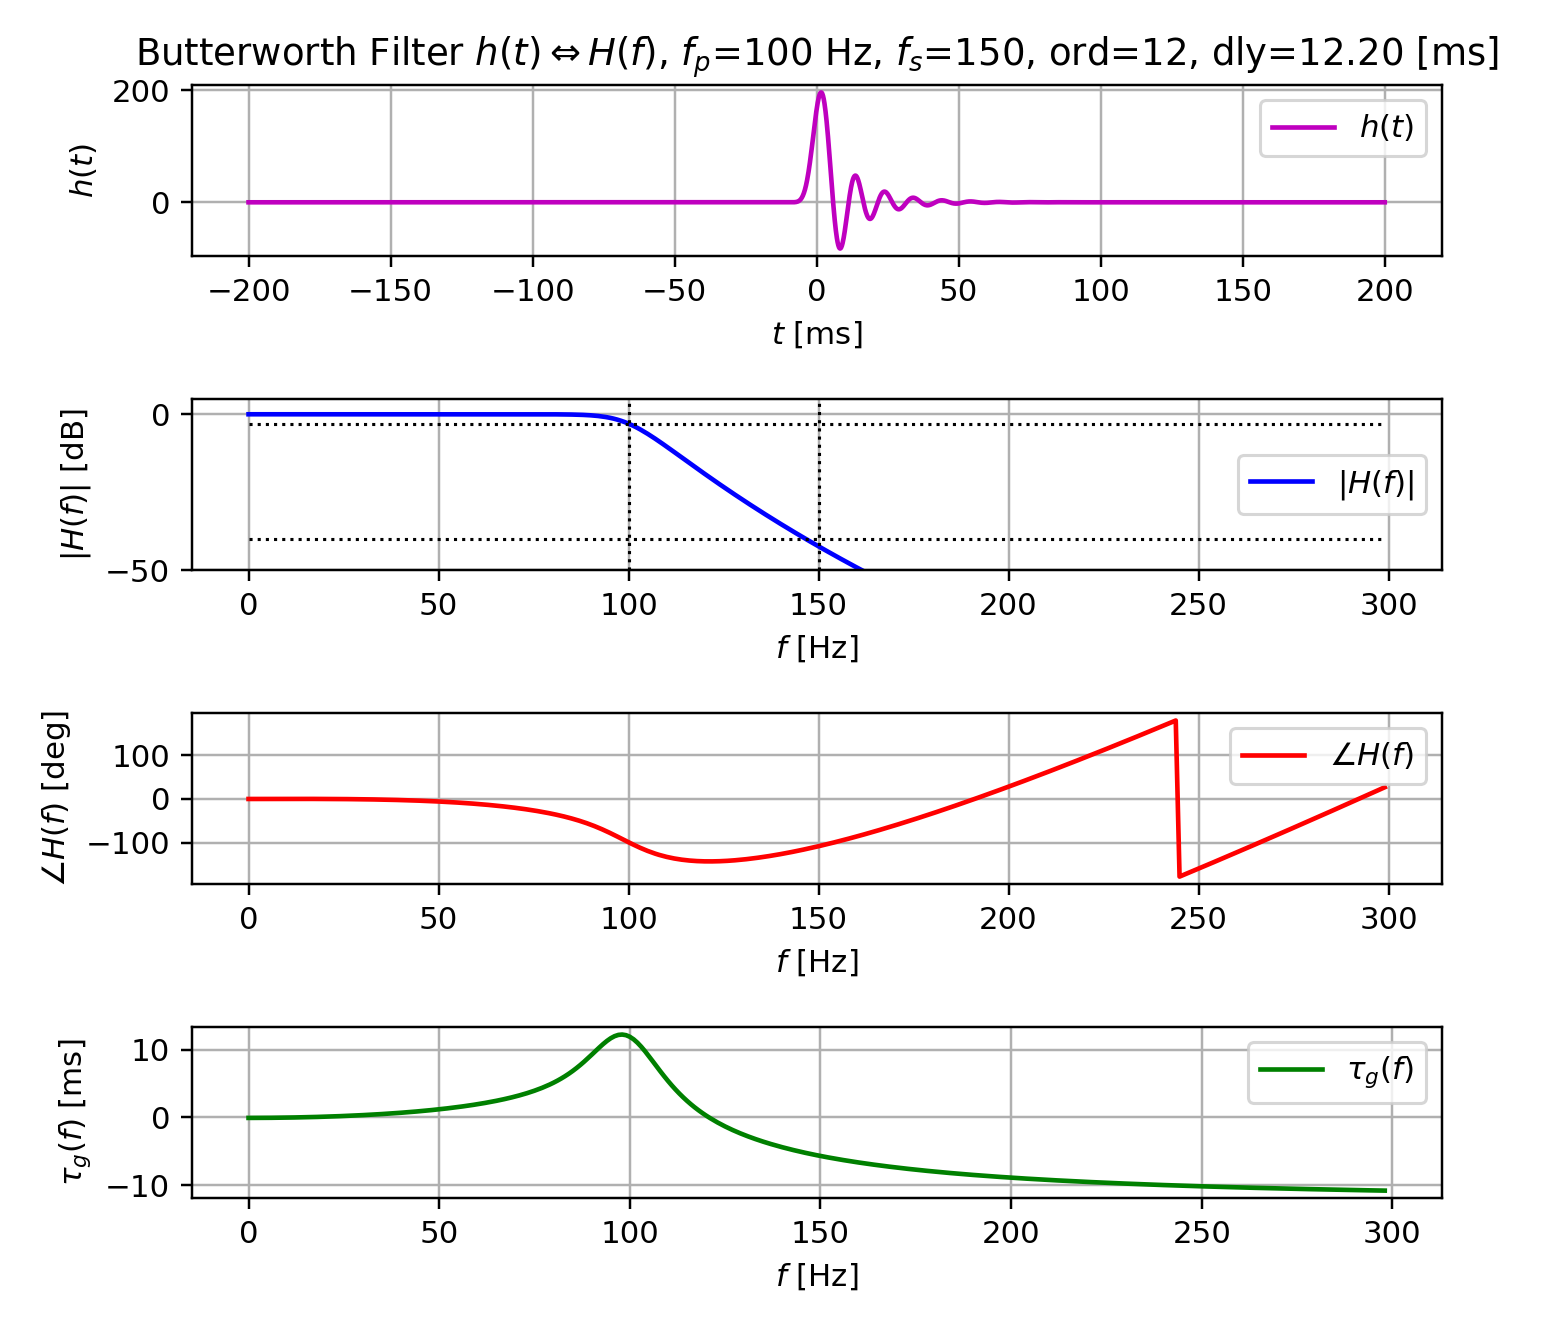

In [7]:
# Butterworth filter 1 plots
plt.figure(3, figsize=fsz1)
plt.subplot(411)
plt.plot(1e3*tt[ixtd], ht_b1[ixtd], '-m', label='$h(t)$')
strt3 = 'Butterworth Filter $h(t)\Leftrightarrow H(f)$'
strt3 = strt3 + ', $f_p$={} Hz, $f_s$={}'.format(fp1, fs1)
strt3 = strt3 + ', ord={}, dly={:5.2f} [ms]'.format(ord_b1, 1e3*dly_b1)
plt.title(strt3)
plt.ylabel('$h(t)$')
plt.xlabel('$t$ [ms]')
plt.legend()
plt.grid()
plt.subplot(412)
plt.plot(ff1, absHf_b1, '-b', label='$|H(f)|$')
plt.plot(ff1, -3*np.ones(ff1.size), ':k', linewidth=1.0)
plt.plot(ff1, -40*np.ones(ff1.size), ':k', linewidth=1.0)
plt.plot([fp1, fp1], [-50, 5], ':k', linewidth=1.0)
plt.plot([fs1, fs1], [-50, 5], ':k', linewidth=1.0)
plt.ylim([-50, 5])
plt.ylabel('$|H(f)|$ [dB]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
plt.subplot(413)
plt.plot(ff1, argHf_b1, '-r', label='$\\angle H(f)$')
plt.ylabel('$\\angle H(f)$ [deg]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
tg_b1 = -1/(2*np.pi)*np.diff(np.unwrap(np.pi/180*argHf_b1))/float(Df)  # group delay
plt.subplot(414)
plt.plot(ff1[:-1], 1e3*tg_b1, '-g', label='$\\tau_g(f)$')
plt.ylabel('$\\tau_g(f)$ [ms]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
plt.tight_layout()

<IPython.core.display.Javascript object>


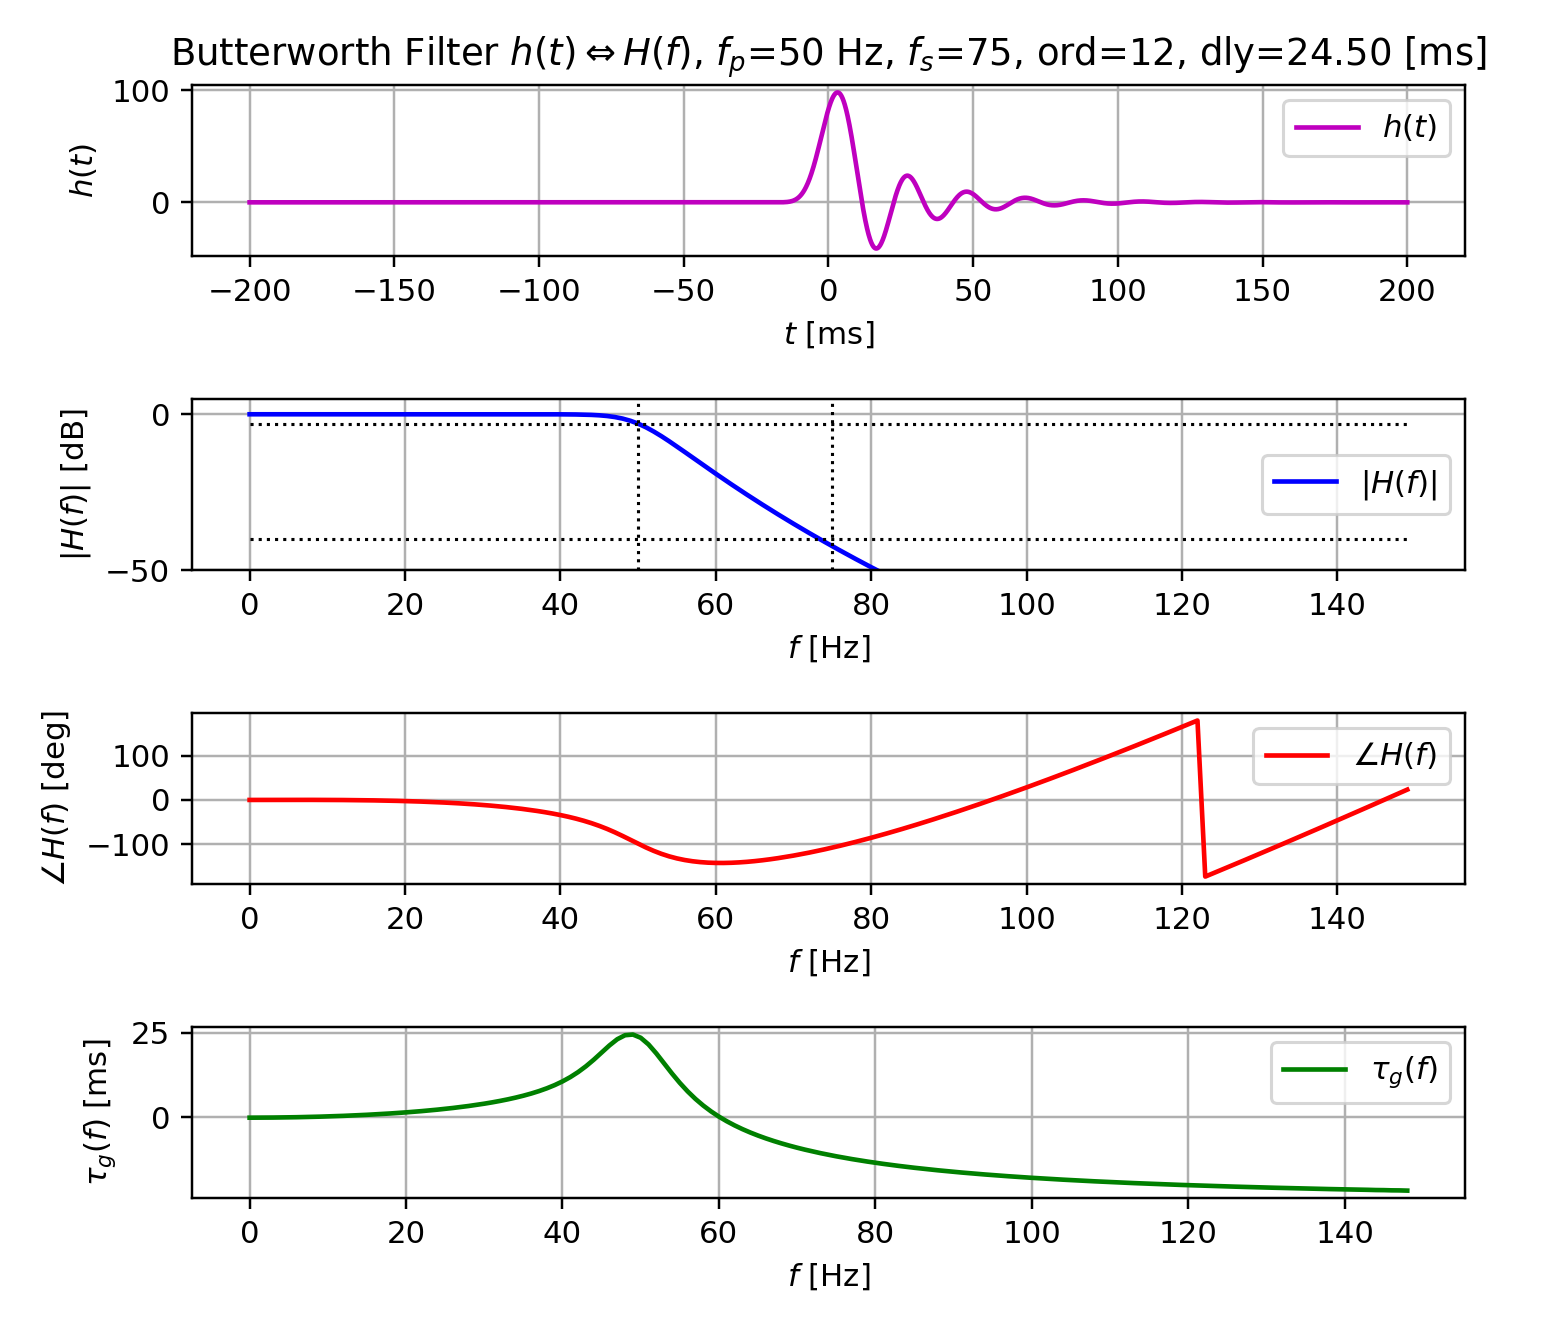

In [8]:
# Butterworth filter 2 plots
plt.figure(7, figsize=fsz1)
plt.subplot(411)
plt.plot(1e3*tt[ixtd], ht_b2[ixtd], '-m', label='$h(t)$')
strt7 = 'Butterworth Filter $h(t)\Leftrightarrow H(f)$'
strt7 = strt7 + ', $f_p$={} Hz, $f_s$={}'.format(fp2, fs2)
strt7 = strt7 + ', ord={}, dly={:5.2f} [ms]'.format(ord_b2, 1e3*dly_b2)
plt.title(strt7)
plt.ylabel('$h(t)$')
plt.xlabel('$t$ [ms]')
plt.legend()
plt.grid()
plt.subplot(412)
plt.plot(ff2, absHf_b2, '-b', label='$|H(f)|$')
plt.plot(ff2, -3*np.ones(ff2.size), ':k', linewidth=1.0)
plt.plot(ff2, -40*np.ones(ff2.size), ':k', linewidth=1.0)
plt.plot([fp2, fp2], [-50, 5], ':k', linewidth=1.0)
plt.plot([fs2, fs2], [-50, 5], ':k', linewidth=1.0)
plt.ylim([-50, 5])
plt.ylabel('$|H(f)|$ [dB]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
plt.subplot(413)
plt.plot(ff2, argHf_b2, '-r', label='$\\angle H(f)$')
plt.ylabel('$\\angle H(f)$ [deg]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
tg_b2 = -1/(2*np.pi)*np.diff(np.unwrap(np.pi/180*argHf_b2))/float(Df)  # group delay
plt.subplot(414)
plt.plot(ff2[:-1], 1e3*tg_b2, '-g', label='$\\tau_g(f)$')
plt.ylabel('$\\tau_g(f)$ [ms]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
plt.tight_layout()

In [9]:
# Chebyshev I filters
ord_c1, wn_c1 = ss.cheb1ord(2*fp1/float(Fs), 2*fs1/float(Fs), gp, gs)
ord_c2, wn_c2 = ss.cheb1ord(2*fp2/float(Fs), 2*fs2/float(Fs), gp, gs)
print("ChebyI1: ord={}, wn={:7.5f}*pi".format(ord_c1, wn_c1/np.pi))
print("ChebyI2: ord={}, wn={:7.5f}*pi".format(ord_c2, wn_c2/np.pi))

ChebyI1: ord=6, wn=0.00796*pi
ChebyI2: ord=6, wn=0.00398*pi


In [10]:
# Compute impulse responses and H(f) of Chebyshev I filters
sos_c1 = ss.cheby1(ord_c1, gp, wn_c1, output='sos')
dly_c1 = 6.0e-3; dly_c1s = round(dly_c1*Fs)  # delay comp in seconds and samples
ht_c1 = ss.sosfilt(sos_c1, np.hstack((deltat, np.zeros(dly_c1s))))
ht_c1 = ht_c1[dly_c1s:]
ff1, absHf_c1, argHf_c1, Df = f19.FTapprox(tt, ht_c1, ff_lim1)
sos_c2 = ss.cheby1(ord_c2, gp, wn_c2, output='sos')
dly_c2 = 12.5e-3; dly_c2s = round(dly_c2*Fs)  # delay comp in seconds and samples
ht_c2 = ss.sosfilt(sos_c2, np.hstack((deltat, np.zeros(dly_c2s))))
ht_c2 = ht_c2[dly_c2s:]
ff2, absHf_c2, argHf_c2, Df = f19.FTapprox(tt, ht_c2, ff_lim2)

<IPython.core.display.Javascript object>


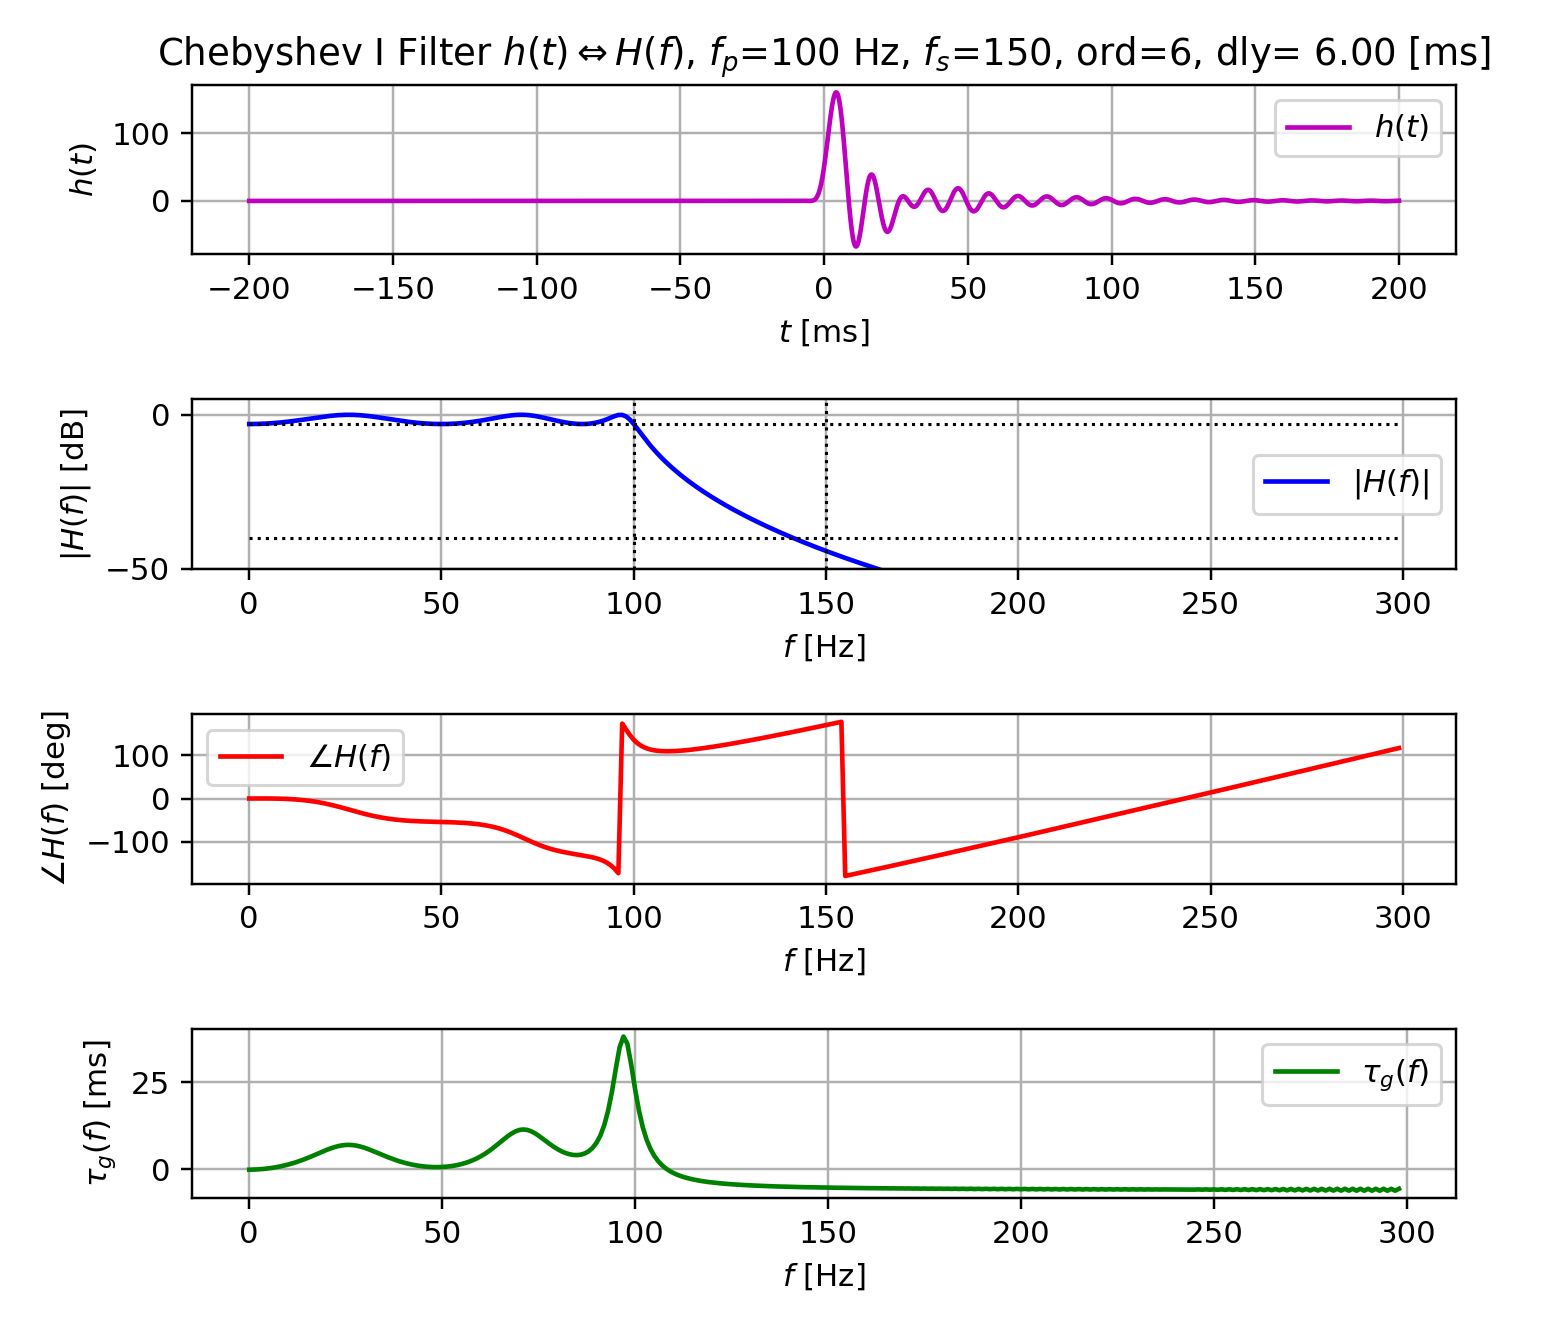

In [11]:
# Chebyshev I filter 1 plots
plt.figure(11, figsize=fsz1)
plt.subplot(411)
plt.plot(1e3*tt[ixtd], ht_c1[ixtd], '-m', label='$h(t)$')
strt11 = 'Chebyshev I Filter $h(t)\Leftrightarrow H(f)$'
strt11 = strt11 + ', $f_p$={} Hz, $f_s$={}'.format(fp1, fs1)
strt11 = strt11 + ', ord={}, dly={:5.2f} [ms]'.format(ord_c1, 1e3*dly_c1)
plt.title(strt11)
plt.ylabel('$h(t)$')
plt.xlabel('$t$ [ms]')
plt.legend()
plt.grid()
plt.subplot(412)
plt.plot(ff1, absHf_c1, '-b', label='$|H(f)|$')
plt.plot(ff1, -3*np.ones(ff1.size), ':k', linewidth=1.0)
plt.plot(ff1, -40*np.ones(ff1.size), ':k', linewidth=1.0)
plt.plot([fp1, fp1], [-50, 5], ':k', linewidth=1.0)
plt.plot([fs1, fs1], [-50, 5], ':k', linewidth=1.0)
plt.ylim([-50, 5])
plt.ylabel('$|H(f)|$ [dB]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
plt.subplot(413)
plt.plot(ff1, argHf_c1, '-r', label='$\\angle H(f)$')
plt.ylabel('$\\angle H(f)$ [deg]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
tg_c1 = -1/(2*np.pi)*np.diff(np.unwrap(np.pi/180*argHf_c1))/float(Df)  # group delay
plt.subplot(414)
plt.plot(ff1[:-1], 1e3*tg_c1, '-g', label='$\\tau_g(f)$')
plt.ylabel('$\\tau_g(f)$ [ms]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
plt.tight_layout()

<IPython.core.display.Javascript object>


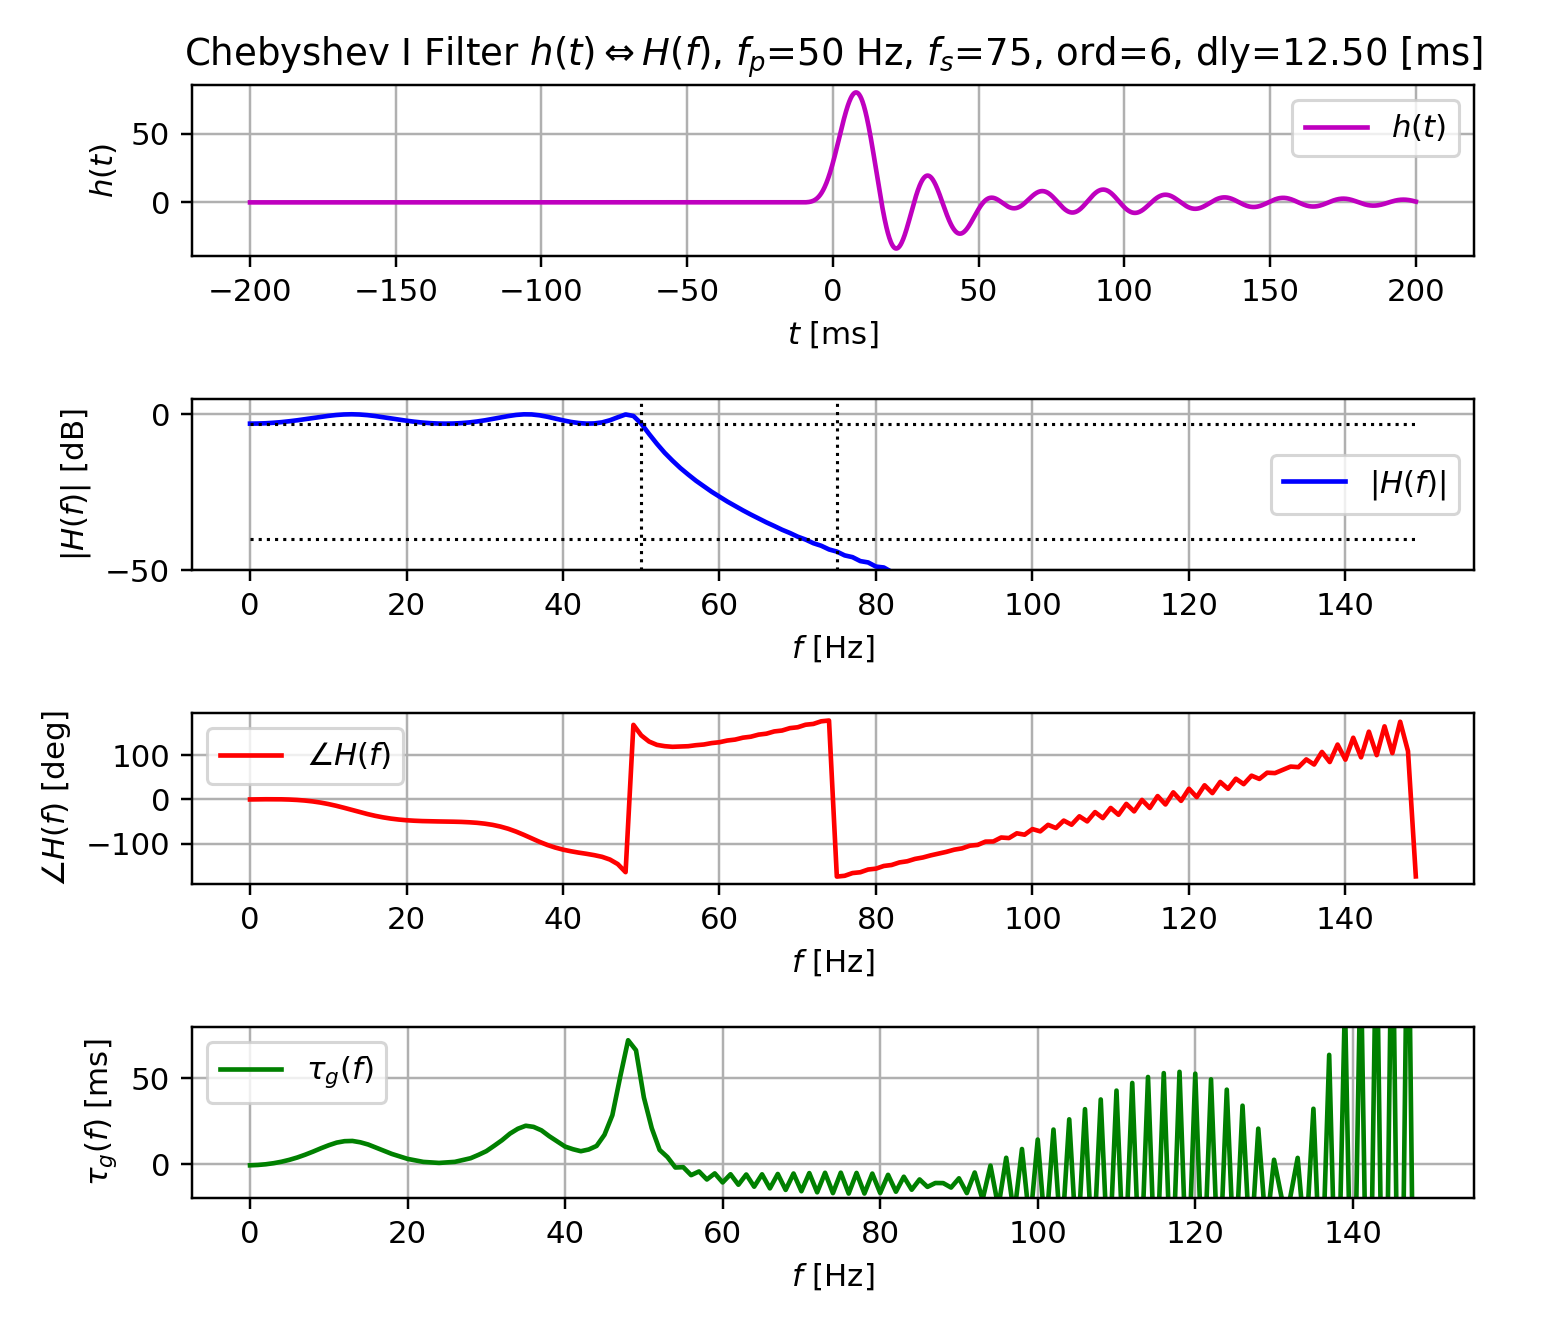

In [12]:
# Chebyshev I filter 2 plots
plt.figure(15, figsize=fsz1)
plt.subplot(411)
plt.plot(1e3*tt[ixtd], ht_c2[ixtd], '-m', label='$h(t)$')
strt15 = 'Chebyshev I Filter $h(t)\Leftrightarrow H(f)$'
strt15 = strt15 + ', $f_p$={} Hz, $f_s$={}'.format(fp2, fs2)
strt15 = strt15 + ', ord={}, dly={:5.2f} [ms]'.format(ord_c2, 1e3*dly_c2)
plt.title(strt15)
plt.ylabel('$h(t)$')
plt.xlabel('$t$ [ms]')
plt.legend()
plt.grid()
plt.subplot(412)
plt.plot(ff2, absHf_c2, '-b', label='$|H(f)|$')
plt.plot(ff2, -3*np.ones(ff2.size), ':k', linewidth=1.0)
plt.plot(ff2, -40*np.ones(ff2.size), ':k', linewidth=1.0)
plt.plot([fp2, fp2], [-50, 5], ':k', linewidth=1.0)
plt.plot([fs2, fs2], [-50, 5], ':k', linewidth=1.0)
plt.ylim([-50, 5])
plt.ylabel('$|H(f)|$ [dB]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
plt.subplot(413)
plt.plot(ff2, argHf_c2, '-r', label='$\\angle H(f)$')
plt.ylabel('$\\angle H(f)$ [deg]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
tg_c2 = -1/(2*np.pi)*np.diff(np.unwrap(np.pi/180*argHf_c2))/float(Df)  # group delay
plt.subplot(414)
plt.plot(ff2[:-1], 1e3*tg_c2, '-g', label='$\\tau_g(f)$')
plt.ylim([-20, 80])
plt.ylabel('$\\tau_g(f)$ [ms]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
plt.tight_layout()

In [13]:
# Brickwall filters
fL1, k1, beta1 = 1.12*fp1, 4, 3.4
ixk1 = round(Fs*k1/(2.0*fL1))
tth1 = np.arange(-ixk1,ixk1)/float(Fs)
h1t = 2*fL1*np.sinc(2*fL1*tth1)
h1t = h1t*np.kaiser(h1t.size, beta1)
ord_bw1 = h1t.size   # filter order
fL2, k2, beta2 = 1.12*fp2, 4, 3.4
ixk2 = round(Fs*k2/(2.0*fL2))
tth2 = np.arange(-ixk2,ixk2)/float(Fs)
h2t = 2*fL2*np.sinc(2*fL2*tth2)
h2t = h2t*np.kaiser(h2t.size, beta2)
ord_bw2 = h2t.size   # filter order
print('Brickwall1: ord={}'.format(ord_bw1))
print('Brickwall2: ord={}'.format(ord_bw2))

Brickwall1: ord=286
Brickwall2: ord=572


In [14]:
# Compute impulse responses and H(f) of Brickwall filters
dly_bw1s = round(ord_bw1/2.0)   # delay comp in samples
ht_bw1 = ss.lfilter(h1t, 1, np.hstack((deltat, np.zeros(dly_bw1s))))/float(Fs)
ht_bw1 = ht_bw1[dly_bw1s:]
ff1, absHf_bw1, argHf_bw1, Df = f19.FTapprox(tt, ht_bw1, ff_lim1)
dly_bw2s = round(ord_bw2/2.0)   # delay comp in samples
ht_bw2 = ss.lfilter(h2t, 1, np.hstack((deltat, np.zeros(dly_bw2s))))/float(Fs)
ht_bw2 = ht_bw2[dly_bw2s:]
ff2, absHf_bw2, argHf_bw2, Df = f19.FTapprox(tt, ht_bw2, ff_lim2)

<IPython.core.display.Javascript object>


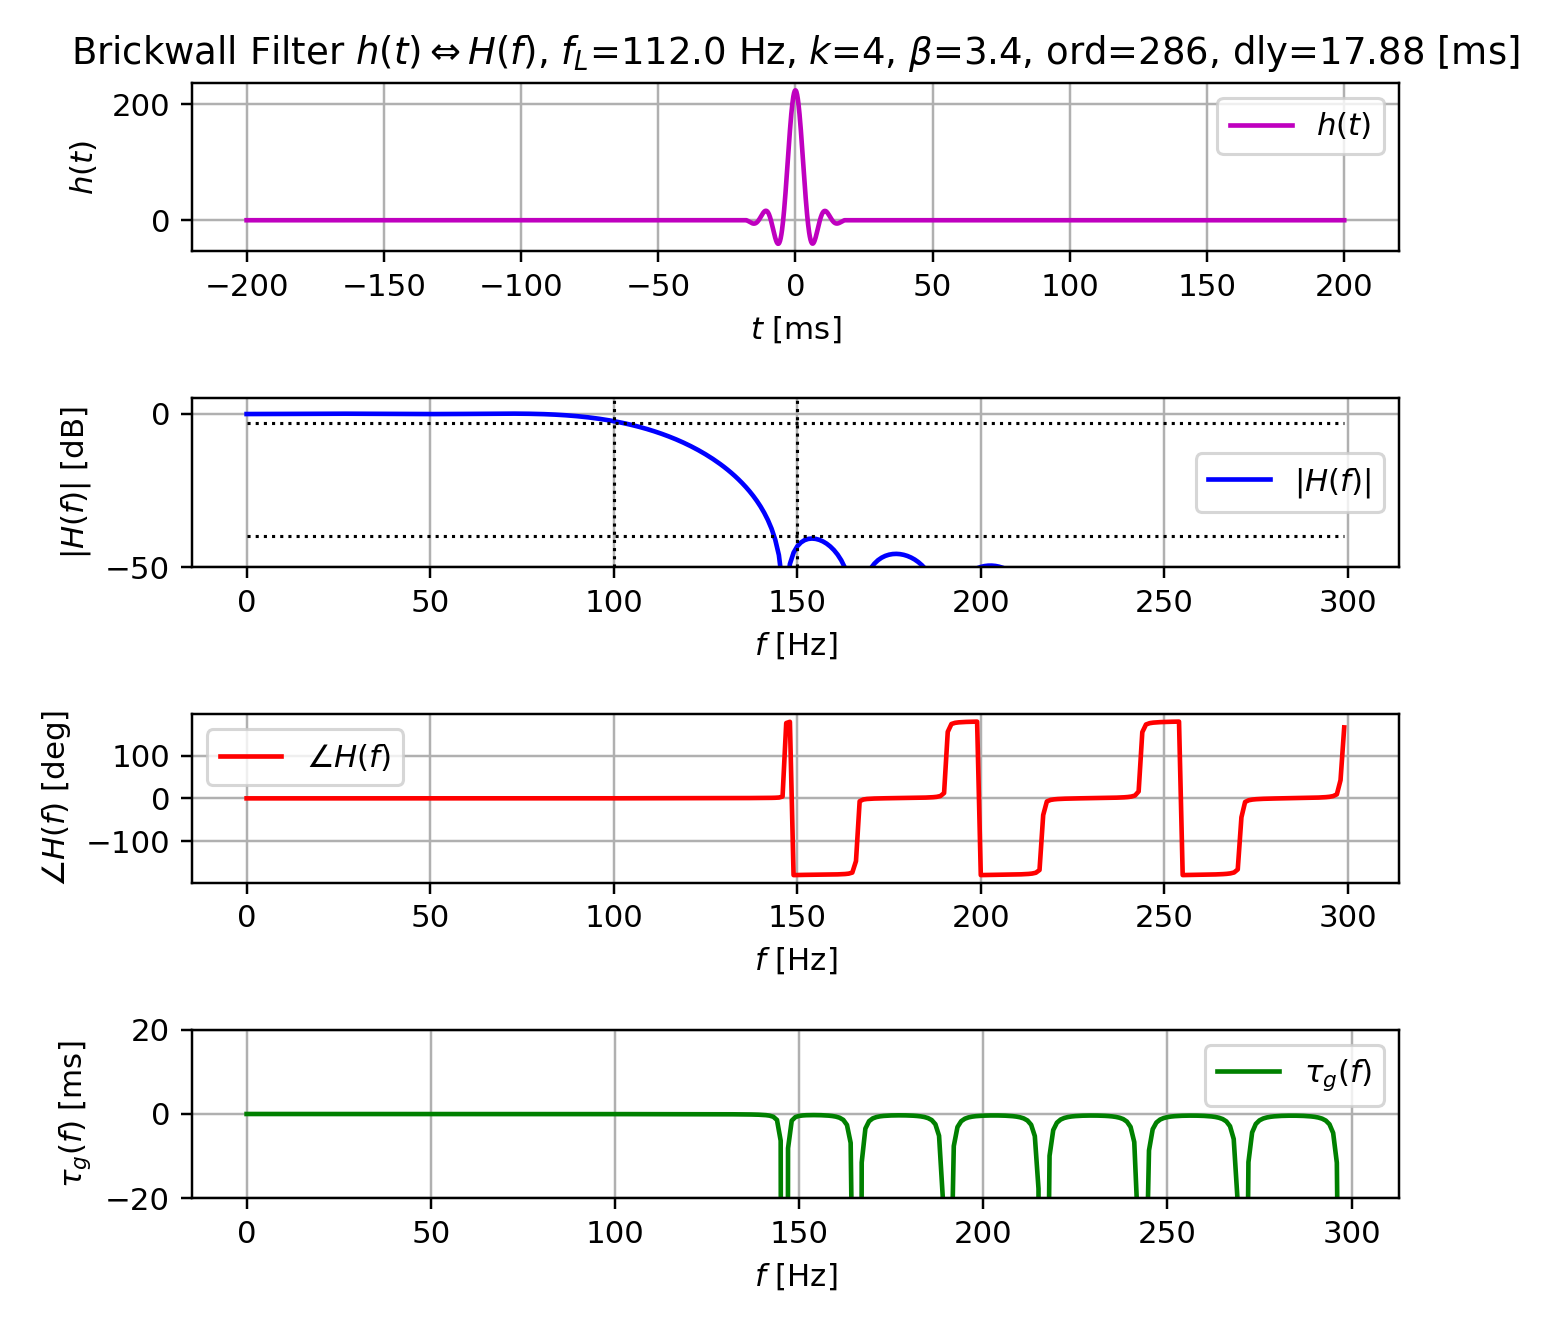

In [15]:
# Brickwall filter 1 plots
plt.figure(19, figsize=fsz1)
plt.subplot(411)
plt.plot(1e3*tt[ixtd], ht_bw1[ixtd], '-m', label='$h(t)$')
strt19 = 'Brickwall Filter $h(t)\Leftrightarrow H(f)$'
strt19 = strt19 + ', $f_L$={:5.1f} Hz, $k$={}, $\\beta$={}'.format(fL1, k1, beta1)
strt19 = strt19 + ', ord={}, dly={:5.2f} [ms]'.format(ord_bw1, 1e3*dly_bw1s/float(Fs))
plt.title(strt19)
plt.ylabel('$h(t)$')
plt.xlabel('$t$ [ms]')
plt.legend()
plt.grid()
plt.subplot(412)
plt.plot(ff1, absHf_bw1, '-b', label='$|H(f)|$')
plt.plot(ff1, -3*np.ones(ff1.size), ':k', linewidth=1.0)
plt.plot(ff1, -40*np.ones(ff1.size), ':k', linewidth=1.0)
plt.plot([fp1, fp1], [-50, 5], ':k', linewidth=1.0)
plt.plot([fs1, fs1], [-50, 5], ':k', linewidth=1.0)
plt.ylim([-50, 5])
plt.ylabel('$|H(f)|$ [dB]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
plt.subplot(413)
plt.plot(ff1, argHf_bw1, '-r', label='$\\angle H(f)$')
plt.ylabel('$\\angle H(f)$ [deg]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
tg_bw1 = -1/(2*np.pi)*np.diff(np.unwrap(np.pi/180*argHf_bw1))/float(Df)  # group delay
plt.subplot(414)
plt.plot(ff1[:-1], 1e3*tg_bw1, '-g', label='$\\tau_g(f)$')
plt.ylim([-20, 20])
plt.ylabel('$\\tau_g(f)$ [ms]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
plt.tight_layout()

<IPython.core.display.Javascript object>


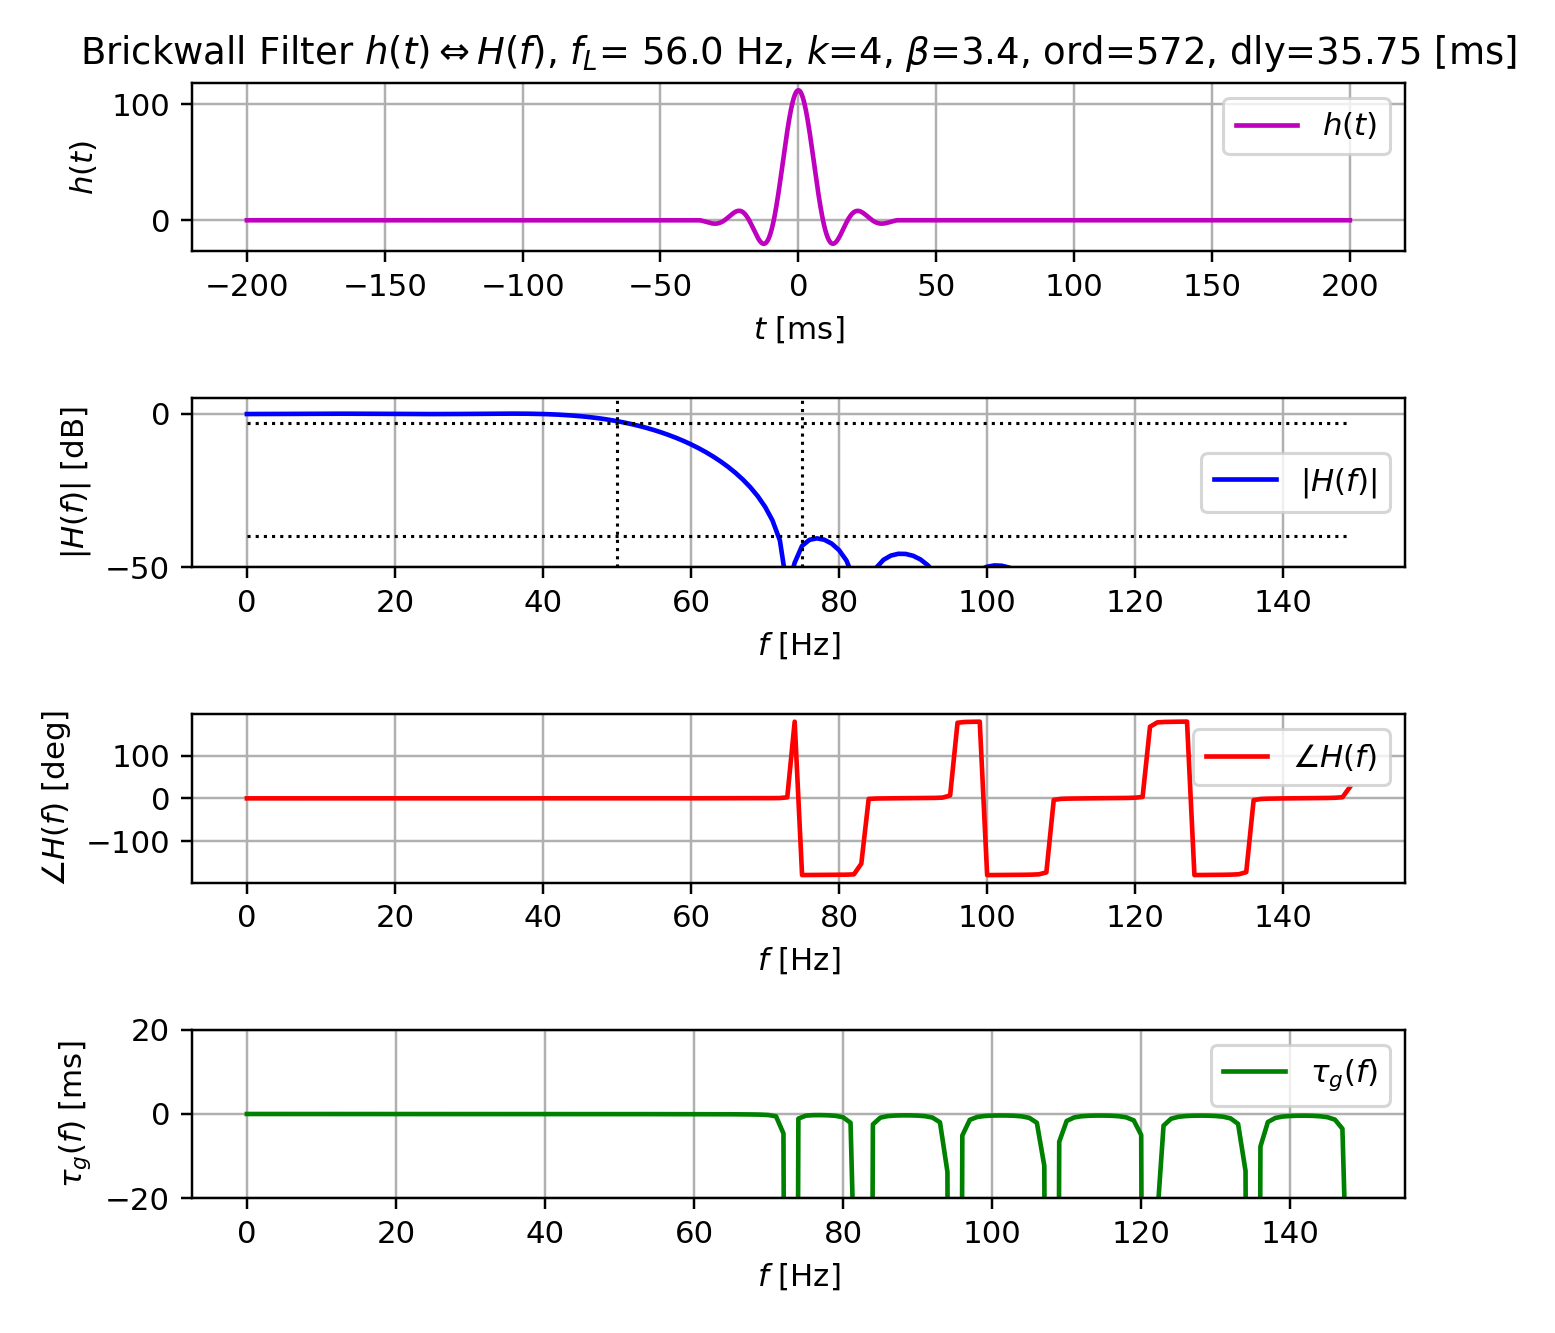

In [16]:
# Brickwall filter 2 plots
plt.figure(23, figsize=fsz1)
plt.subplot(411)
plt.plot(1e3*tt[ixtd], ht_bw2[ixtd], '-m', label='$h(t)$')
strt23 = 'Brickwall Filter $h(t)\Leftrightarrow H(f)$'
strt23 = strt23 + ', $f_L$={:5.1f} Hz, $k$={}, $\\beta$={}'.format(fL2, k2, beta2)
strt23 = strt23 + ', ord={}, dly={:5.2f} [ms]'.format(ord_bw2, 1e3*dly_bw2s/float(Fs))
plt.title(strt23)
plt.ylabel('$h(t)$')
plt.xlabel('$t$ [ms]')
plt.legend()
plt.grid()
plt.subplot(412)
plt.plot(ff2, absHf_bw2, '-b', label='$|H(f)|$')
plt.plot(ff2, -3*np.ones(ff2.size), ':k', linewidth=1.0)
plt.plot(ff2, -40*np.ones(ff2.size), ':k', linewidth=1.0)
plt.plot([fp2, fp2], [-50, 5], ':k', linewidth=1.0)
plt.plot([fs2, fs2], [-50, 5], ':k', linewidth=1.0)
plt.ylim([-50, 5])
plt.ylabel('$|H(f)|$ [dB]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
plt.subplot(413)
plt.plot(ff2, argHf_bw2, '-r', label='$\\angle H(f)$')
plt.ylabel('$\\angle H(f)$ [deg]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
tg_bw2 = -1/(2*np.pi)*np.diff(np.unwrap(np.pi/180*argHf_bw2))/float(Df)  # group delay
plt.subplot(414)
plt.plot(ff2[:-1], 1e3*tg_bw2, '-g', label='$\\tau_g(f)$')
plt.ylim([-20, 20])
plt.ylabel('$\\tau_g(f)$ [ms]')
plt.xlabel('$f$ [Hz]')
plt.legend()
plt.grid()
plt.tight_layout()

In [17]:
# Parameters for PAM signal
FB = 100    # baud rate
txt = "The quick brown fox jumps over the lazy dog 0123456789!"
bits = 8
ptype1, pparms1 = 'rect', []
ptype2, pparms2 = 'sinc', [10, 6.0]

In [18]:
dn = f19.asc2bin(txt, bits)
an = 2*dn - 1    # polar DT signal
tts, s1t = f19.pam15(an, FB, Fs, ptype1, pparms1)
tts, s2t = f19.pam15(an, FB, Fs, ptype2, pparms2)

<IPython.core.display.Javascript object>


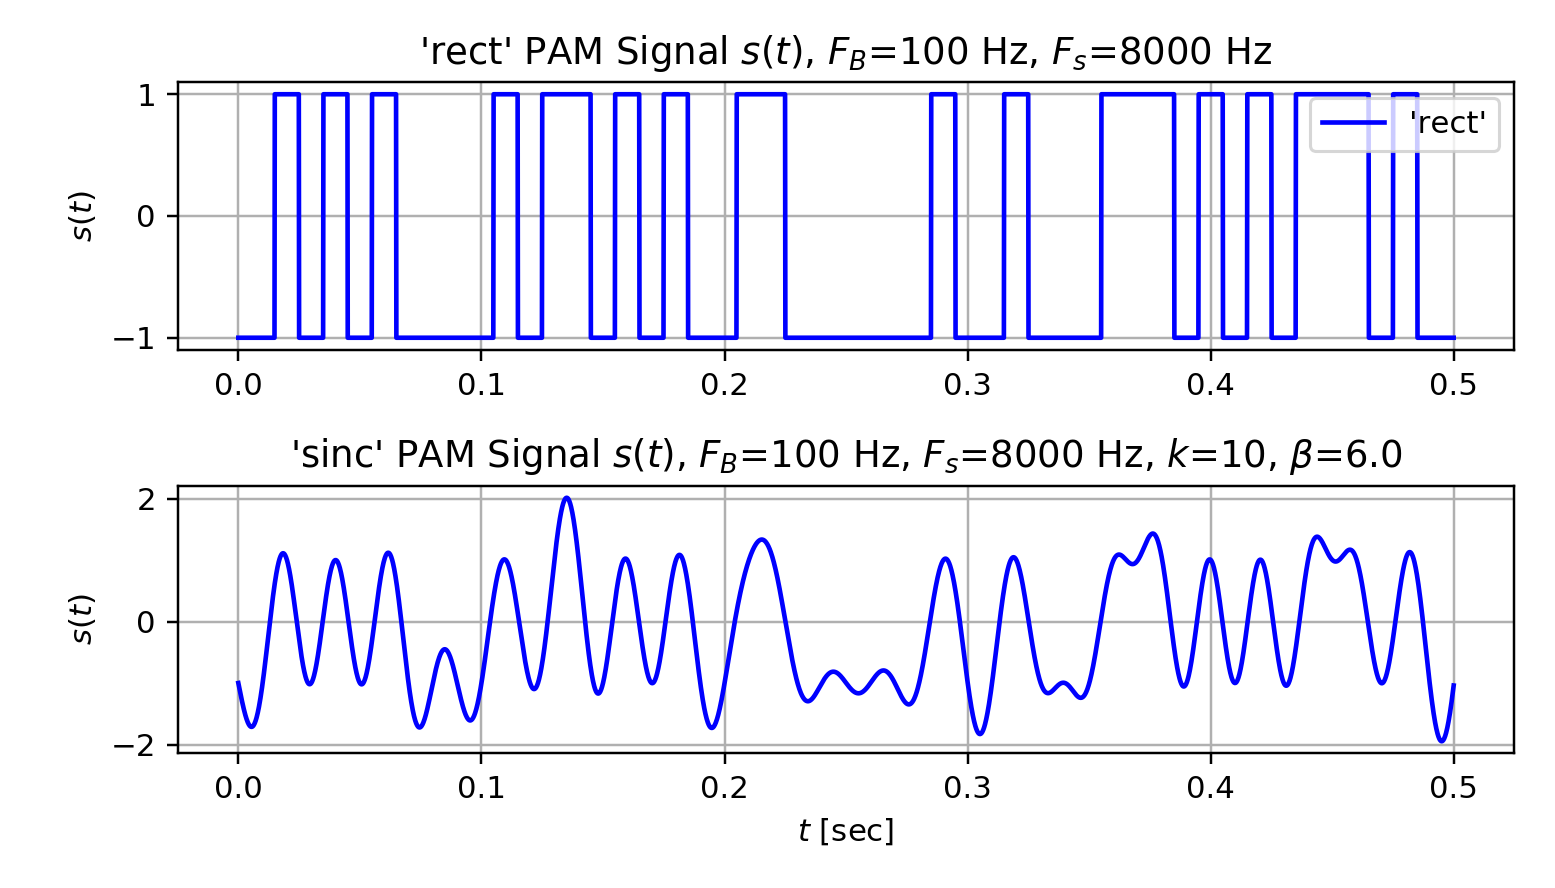

In [19]:
ts1, ts2 = 0, 5e-1
ixtds = np.where(np.logical_and(tts>=ts1, tts<ts2))[0]
plt.figure(27, figsize=fsz)
plt.subplot(211)
plt.plot(tts[ixtds], s1t[ixtds], '-b', label="'rect'")
strt27a = "'{}' PAM Signal $s(t)$".format(ptype1)
strt27a = strt27a + ', $F_B$={} Hz'.format(FB)
strt27a = strt27a + ', $F_s$={} Hz'.format(Fs)
if ptype1 == 'sinc':
    strt27a = strt27a + ', $k$={}, $\\beta$={}'.format(*pparms1)
if (ptype1 == 'rcf' or ptype1 == 'rrcf'):
    strt27a = strt27a + ', $k$={}, $\\alpha$={}'.format(*pparms1)
plt.title(strt27a)
plt.ylabel('$s(t)$')
#plt.xlabel('$t$ [sec]')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(tts[ixtds], s2t[ixtds], '-b', label="'sinc'")
strt27b = "'{}' PAM Signal $s(t)$".format(ptype2)
strt27b = strt27b + ', $F_B$={} Hz'.format(FB)
strt27b = strt27b + ', $F_s$={} Hz'.format(Fs)
if ptype2 == 'sinc':
    strt27b = strt27b + ', $k$={}, $\\beta$={}'.format(*pparms2)
if (ptype2 == 'rcf' or ptype2 == 'rrcf'):
    strt27b = strt27b + ', $k$={}, $\\alpha$={}'.format(*pparms2)
plt.title(strt27b)
plt.ylabel('$s(t)$')
plt.xlabel('$t$ [sec]')
plt.legend
plt.grid()
plt.tight_layout()

<IPython.core.display.Javascript object>


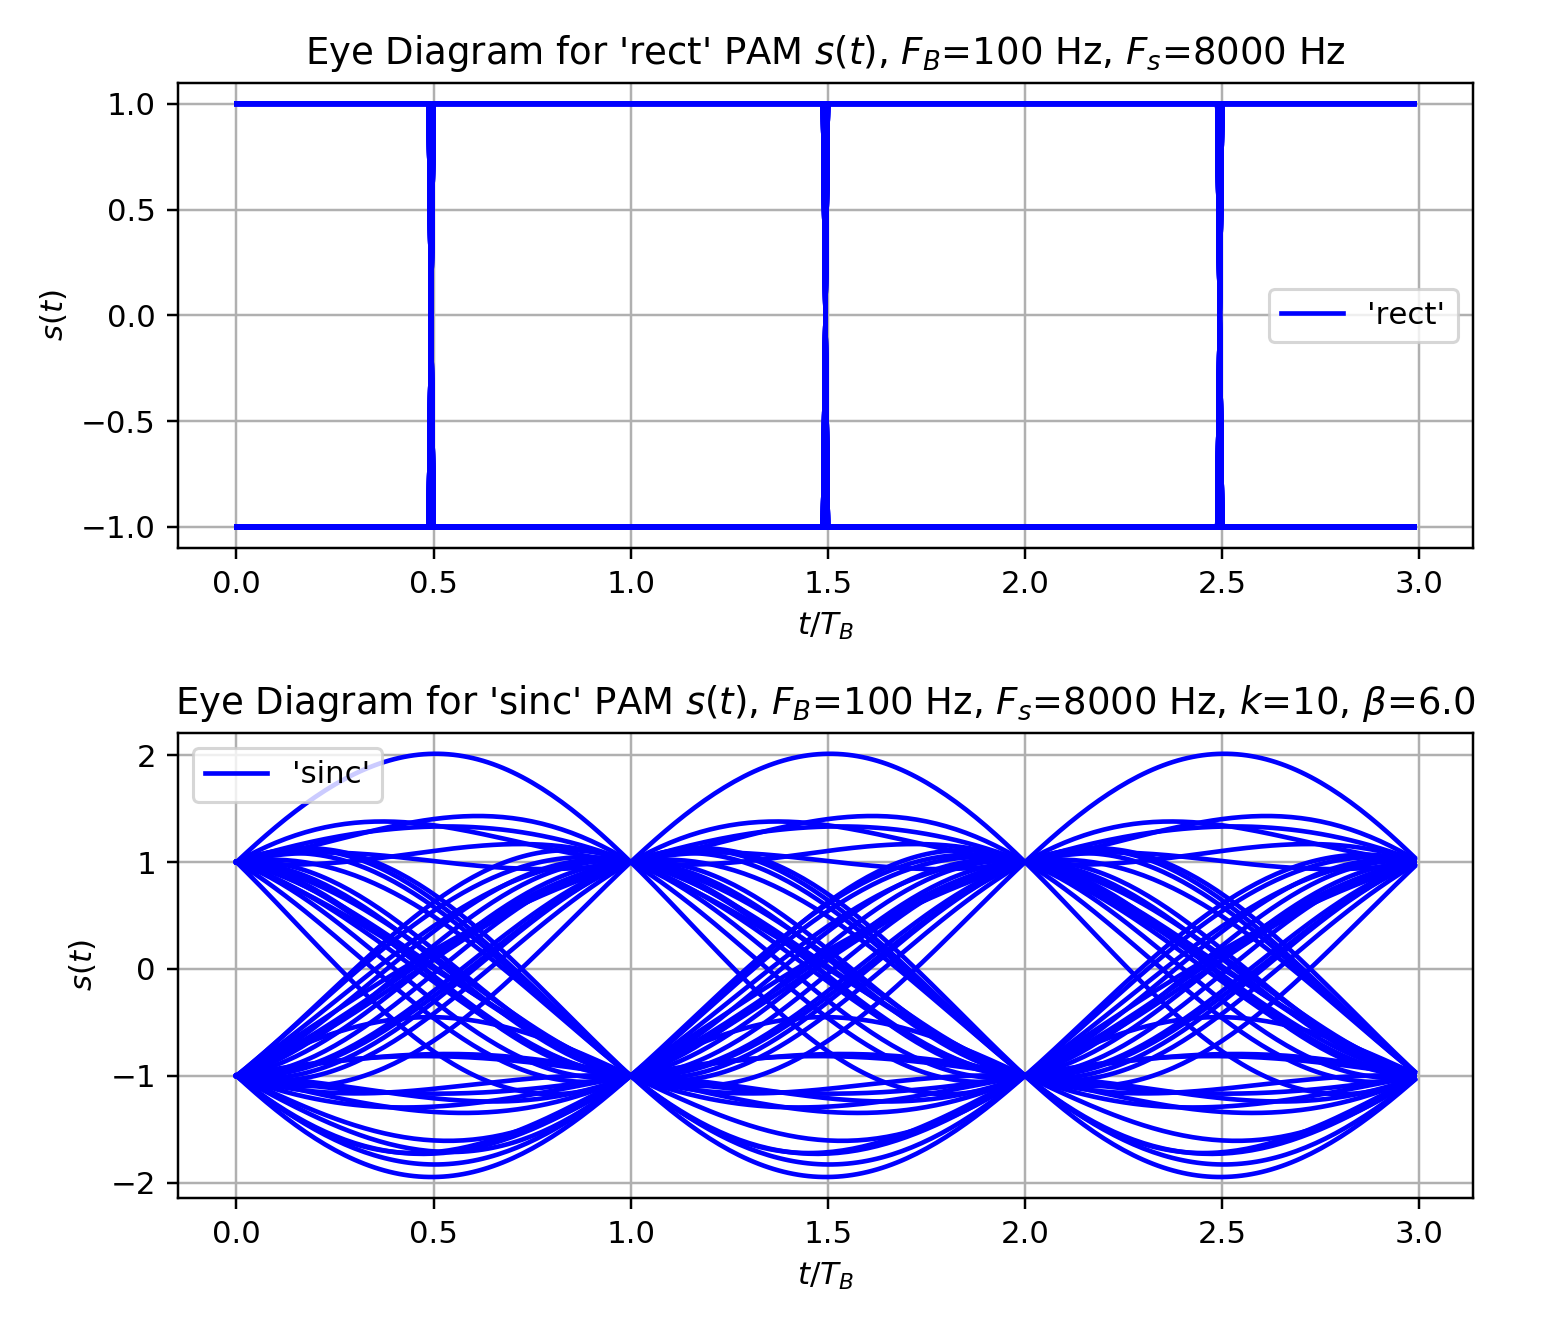

In [20]:
ttAs1t, As1t = f19.eyediagram(tts, s1t, FB)
ttAs2t, As2t = f19.eyediagram(tts, s2t, FB)
plt.figure(31, figsize=fsz1)
plt.subplot(211)
plt.plot(ttAs1t, As1t[0], '-b', label="'rect'")
for i in range(1,As1t.shape[0]):
    plt.plot(ttAs1t, As1t[i], '-b')
strt31a = "Eye Diagram for '{}' PAM $s(t)$".format(ptype1)
strt31a = strt31a + ', $F_B$={} Hz'.format(FB)
strt31a = strt31a + ', $F_s$={} Hz'.format(Fs)
if ptype1 == 'sinc':
    strt31a = strt31a + ', $k$={}, $\\beta$={}'.format(*pparms1)
if (ptype1 == 'rcf' or ptype1 == 'rrcf'):
    strt31a = strt31a + ', $k$={}, $\\alpha$={}'.format(*pparms1)
plt.title(strt31a)
plt.ylabel('$s(t)$')
plt.xlabel('$t/T_B$')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(ttAs2t, As2t[0], '-b', label="'sinc'")
for i in range(1,As2t.shape[0]):
    plt.plot(ttAs2t, As2t[i], '-b')
strt31b = "Eye Diagram for '{}' PAM $s(t)$".format(ptype2)
strt31b = strt31b + ', $F_B$={} Hz'.format(FB)
strt31b = strt31b + ', $F_s$={} Hz'.format(Fs)
if ptype2 == 'sinc':
    strt31b = strt31b + ', $k$={}, $\\beta$={}'.format(*pparms2)
if (ptype2 == 'rcf' or ptype2 == 'rrcf'):
    strt31b = strt31b + ', $k$={}, $\\alpha$={}'.format(*pparms2)
plt.title(strt31b)
plt.ylabel('$s(t)$')
plt.xlabel('$t/T_B$')
plt.legend()
plt.grid()
plt.tight_layout()

In [21]:
# Apply Butterworth filters to PAM signals
rt_b1s1 = ss.sosfilt(sos_b1, np.hstack((s1t, np.zeros(dly_b1s))))
rt_b1s1 = rt_b1s1[dly_b1s:]
rt_b1s2 = ss.sosfilt(sos_b1, np.hstack((s2t, np.zeros(dly_b1s))))
rt_b1s2 = rt_b1s2[dly_b1s:]
rt_b2s1 = ss.sosfilt(sos_b2, np.hstack((s1t, np.zeros(dly_b2s))))
rt_b2s1 = rt_b2s1[dly_b2s:]
rt_b2s2 = ss.sosfilt(sos_b2, np.hstack((s2t, np.zeros(dly_b2s))))
rt_b2s2 = rt_b2s2[dly_b2s:]

<IPython.core.display.Javascript object>


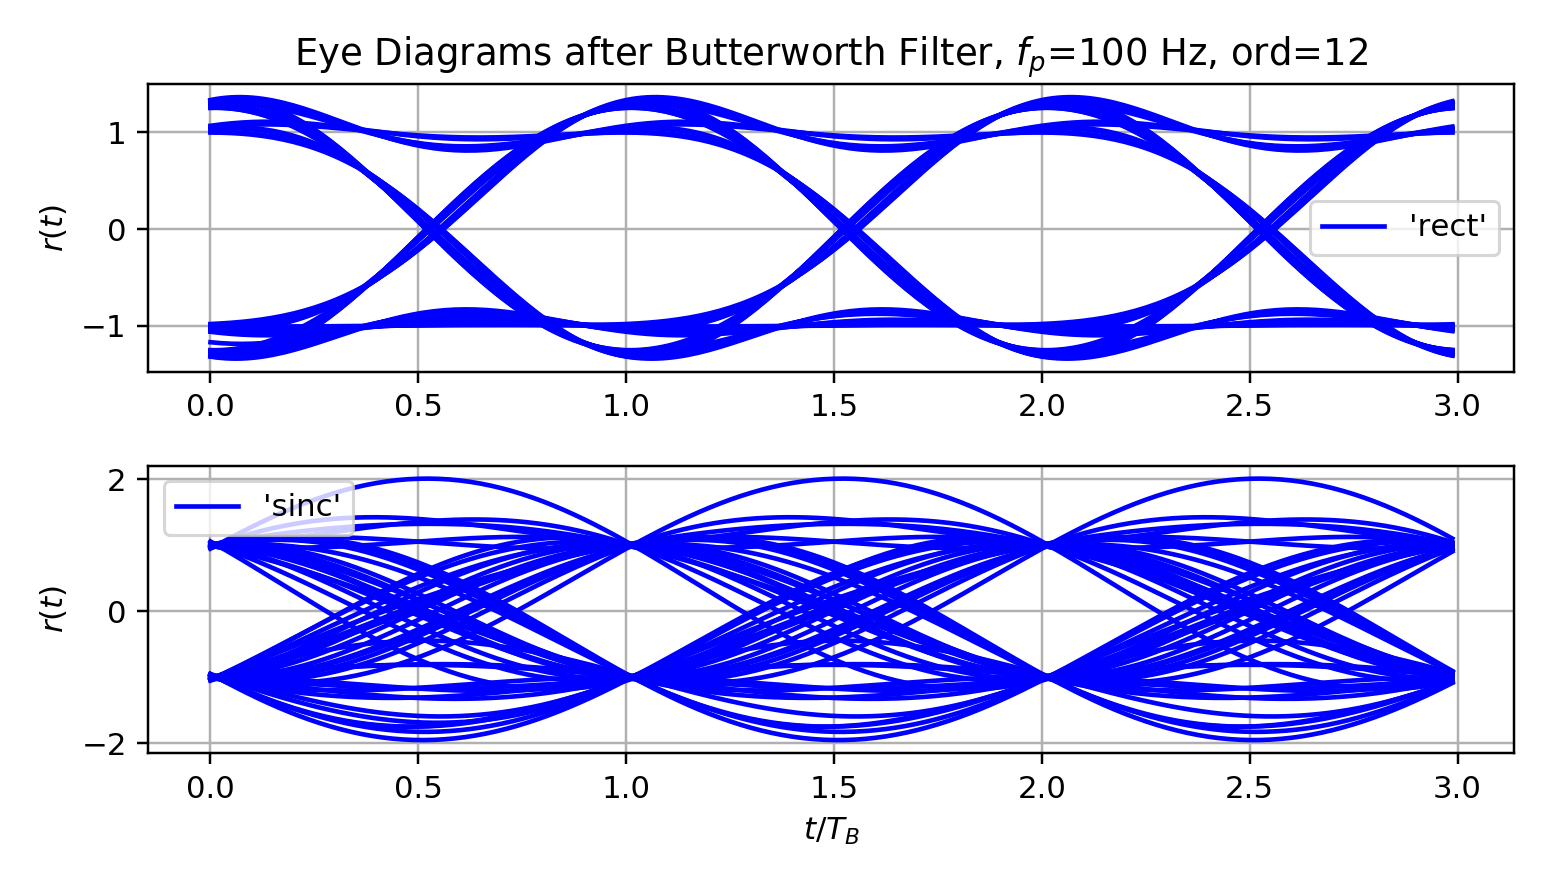

In [22]:
ttArt_b1s1, Art_b1s1 = f19.eyediagram(tts, rt_b1s1, FB)
ttArt_b1s2, Art_b1s2 = f19.eyediagram(tts, rt_b1s2, FB)
plt.figure(35, figsize=fsz)
plt.subplot(211)
plt.plot(ttArt_b1s1, Art_b1s1[0], '-b', label="'rect'")
for i in range(1,Art_b1s1.shape[0]):
    plt.plot(ttArt_b1s1, Art_b1s1[i], '-b')
strt35 = "Eye Diagrams after Butterworth Filter"
strt35 = strt35 + ', $f_p$={} Hz, ord={}'.format(fp1, ord_b1)
plt.title(strt35)
plt.ylabel('$r(t)$')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(ttArt_b1s2, Art_b1s2[0], '-b', label="'sinc'")
for i in range(1,Art_b1s2.shape[0]):
    plt.plot(ttArt_b1s2, Art_b1s2[i], '-b')
plt.ylabel('$r(t)$')
plt.xlabel('$t/T_B$')
plt.legend()
plt.grid()
plt.tight_layout()

<IPython.core.display.Javascript object>


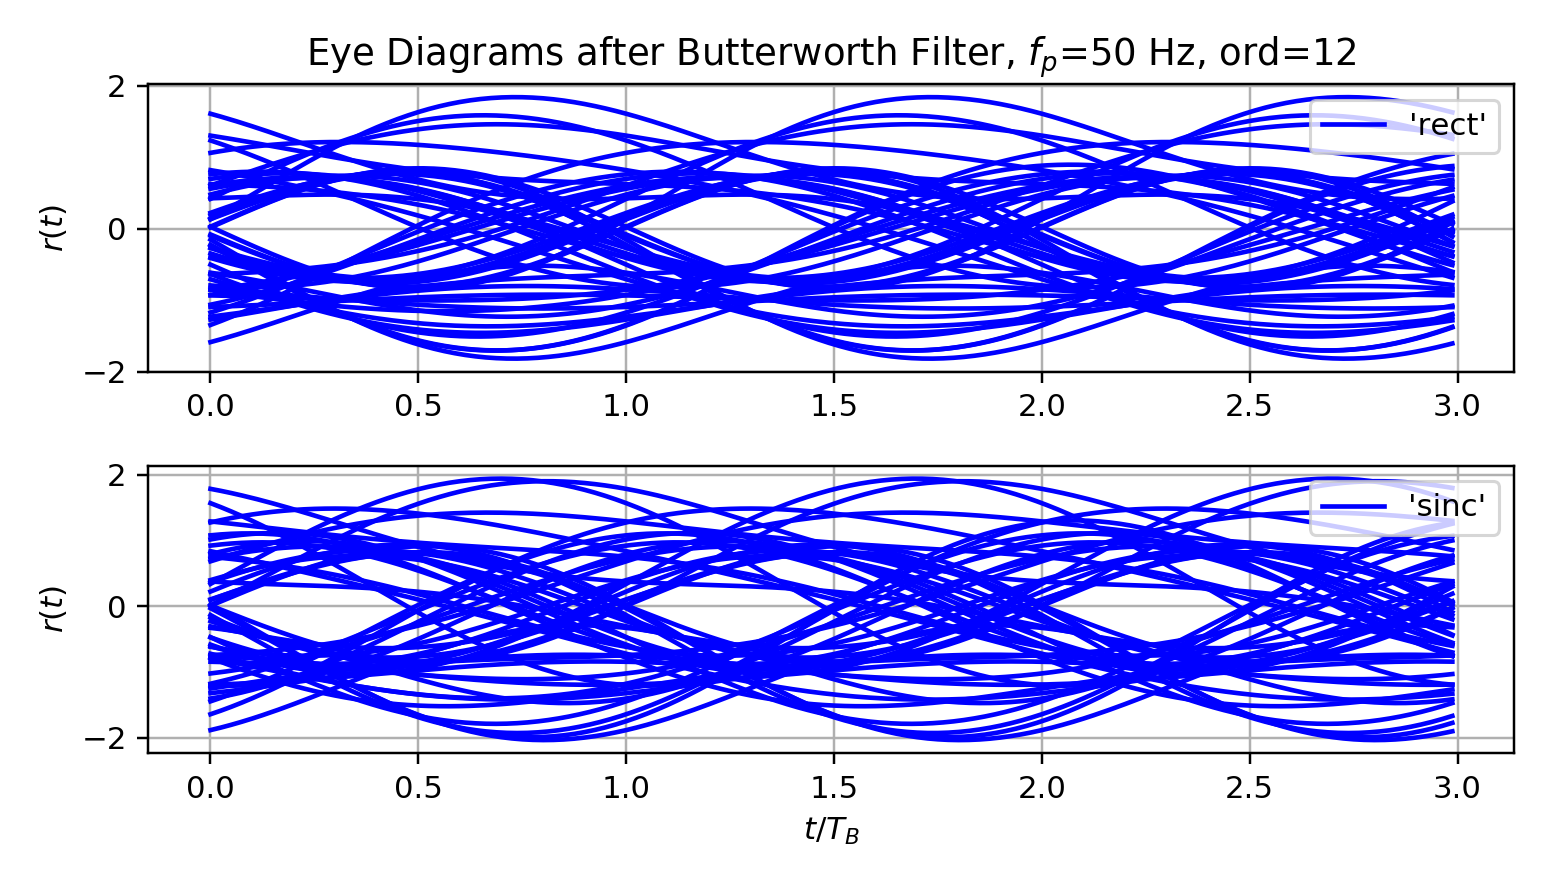

In [23]:
ttArt_b2s1, Art_b2s1 = f19.eyediagram(tts, rt_b2s1, FB)
ttArt_b2s2, Art_b2s2 = f19.eyediagram(tts, rt_b2s2, FB)
plt.figure(39, figsize=fsz)
plt.subplot(211)
plt.plot(ttArt_b2s1, Art_b2s1[0], '-b', label="'rect'")
for i in range(1,Art_b2s1.shape[0]):
    plt.plot(ttArt_b2s1, Art_b2s1[i], '-b')
strt39 = "Eye Diagrams after Butterworth Filter"
strt39 = strt39 + ', $f_p$={} Hz, ord={}'.format(fp2, ord_b2)
plt.title(strt39)
plt.ylabel('$r(t)$')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(ttArt_b2s2, Art_b2s2[0], '-b', label="'sinc'")
for i in range(1,Art_b2s2.shape[0]):
    plt.plot(ttArt_b2s2, Art_b2s2[i], '-b')
plt.ylabel('$r(t)$')
plt.xlabel('$t/T_B$')
plt.legend()
plt.grid()
plt.tight_layout()

In [24]:
# Apply Chebyshev I filters to PAM signals
rt_c1s1 = ss.sosfilt(sos_c1, np.hstack((s1t, np.zeros(dly_c1s))))
rt_c1s1 = rt_c1s1[dly_c1s:]
rt_c1s2 = ss.sosfilt(sos_c1, np.hstack((s2t, np.zeros(dly_c1s))))
rt_c1s2 = rt_c1s2[dly_c1s:]
rt_c2s1 = ss.sosfilt(sos_c2, np.hstack((s1t, np.zeros(dly_c2s))))
rt_c2s1 = rt_c2s1[dly_c2s:]
rt_c2s2 = ss.sosfilt(sos_c2, np.hstack((s2t, np.zeros(dly_c2s))))
rt_c2s2 = rt_c2s2[dly_c2s:]

<IPython.core.display.Javascript object>


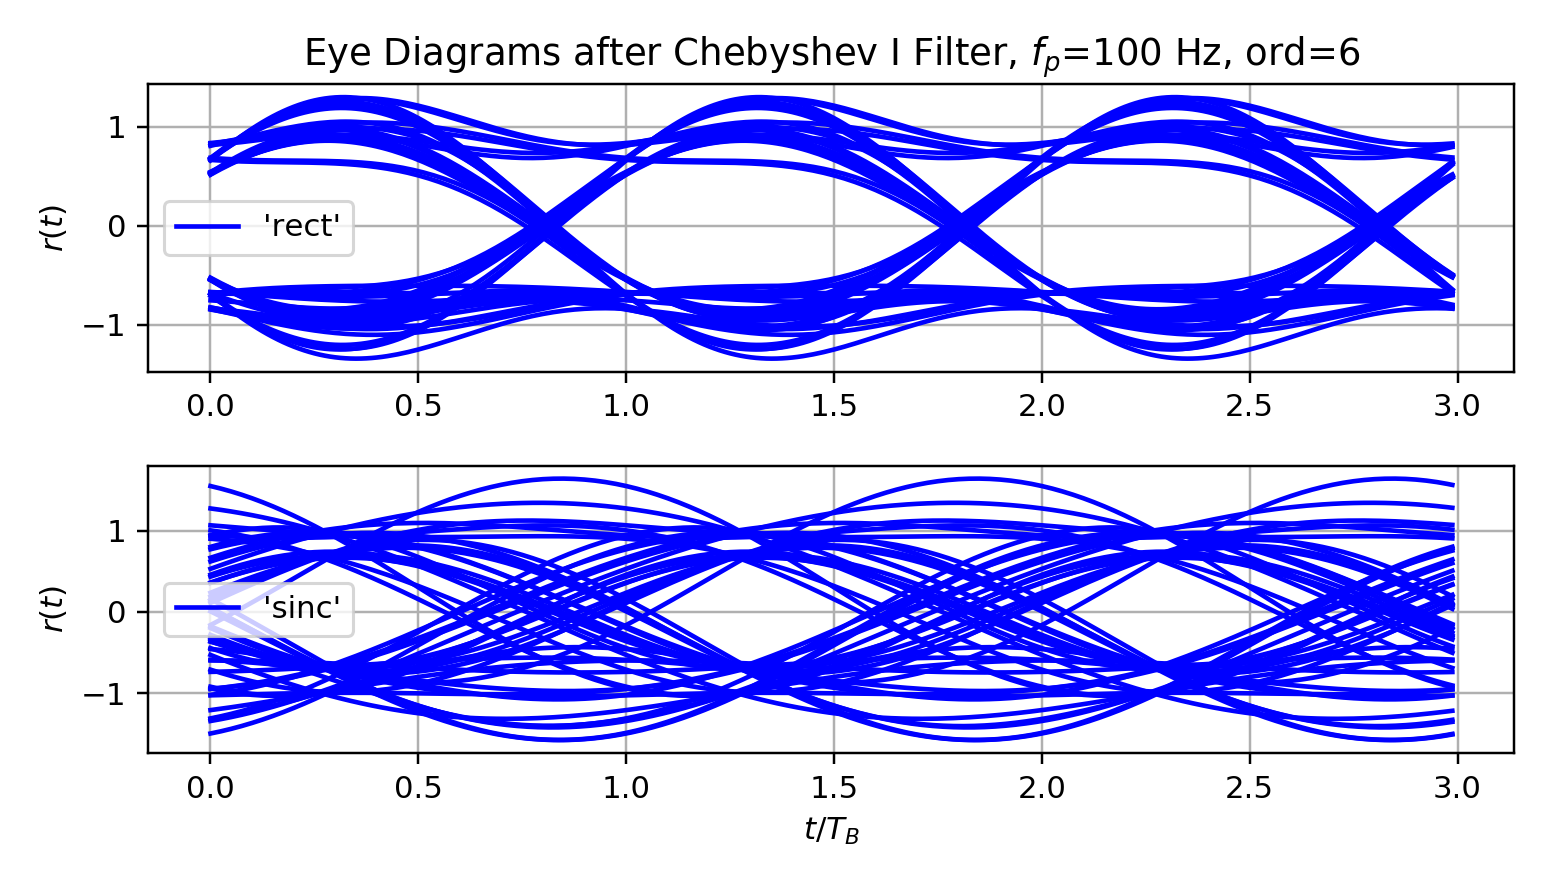

In [25]:
ttArt_c1s1, Art_c1s1 = f19.eyediagram(tts, rt_c1s1, FB)
ttArt_c1s2, Art_c1s2 = f19.eyediagram(tts, rt_c1s2, FB)
plt.figure(43, figsize=fsz)
plt.subplot(211)
plt.plot(ttArt_c1s1, Art_c1s1[0], '-b', label="'rect'")
for i in range(1,Art_c1s1.shape[0]):
    plt.plot(ttArt_c1s1, Art_c1s1[i], '-b')
strt43 = "Eye Diagrams after Chebyshev I Filter"
strt43 = strt43 + ', $f_p$={} Hz, ord={}'.format(fp1, ord_c1)
plt.title(strt43)
plt.ylabel('$r(t)$')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(ttArt_c1s2, Art_c1s2[0], '-b', label="'sinc'")
for i in range(1,Art_c1s2.shape[0]):
    plt.plot(ttArt_c1s2, Art_c1s2[i], '-b')
plt.ylabel('$r(t)$')
plt.xlabel('$t/T_B$')
plt.legend()
plt.grid()
plt.tight_layout()

<IPython.core.display.Javascript object>


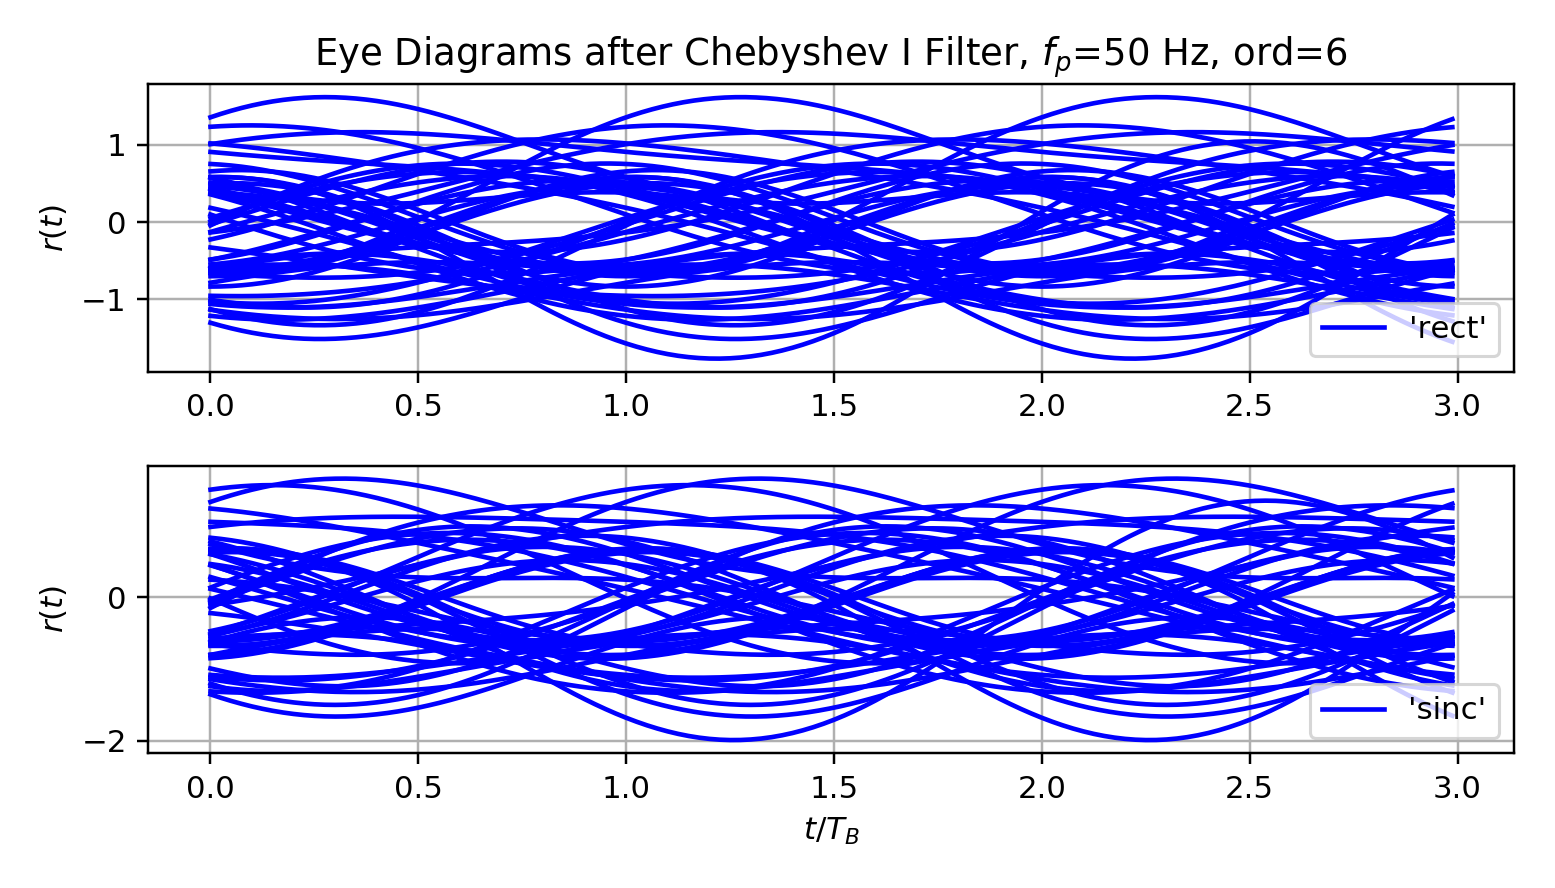

In [26]:
ttArt_c2s1, Art_c2s1 = f19.eyediagram(tts, rt_c2s1, FB)
ttArt_c2s2, Art_c2s2 = f19.eyediagram(tts, rt_c2s2, FB)
plt.figure(47, figsize=fsz)
plt.subplot(211)
plt.plot(ttArt_c2s1, Art_c2s1[0], '-b', label="'rect'")
for i in range(1,Art_c2s1.shape[0]):
    plt.plot(ttArt_c2s1, Art_c2s1[i], '-b')
strt47 = "Eye Diagrams after Chebyshev I Filter"
strt47 = strt47 + ', $f_p$={} Hz, ord={}'.format(fp2, ord_c2)
plt.title(strt47)
plt.ylabel('$r(t)$')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(ttArt_c2s2, Art_c2s2[0], '-b', label="'sinc'")
for i in range(1,Art_c2s2.shape[0]):
    plt.plot(ttArt_c2s2, Art_c2s2[i], '-b')
plt.ylabel('$r(t)$')
plt.xlabel('$t/T_B$')
plt.legend()
plt.grid()
plt.tight_layout()

In [27]:
# Apply Brickwall filters to PAM signals
rt_bw1s1 = ss.lfilter(h1t, 1, np.hstack((s1t, np.zeros(dly_bw1s))))/float(Fs)
rt_bw1s1 = rt_bw1s1[dly_bw1s:]
rt_bw1s2 = ss.lfilter(h1t, 1, np.hstack((s2t, np.zeros(dly_bw1s))))/float(Fs)
rt_bw1s2 = rt_bw1s2[dly_bw1s:]
rt_bw2s1 = ss.lfilter(h2t, 1, np.hstack((s1t, np.zeros(dly_bw2s))))/float(Fs)
rt_bw2s1 = rt_bw2s1[dly_bw2s:]
rt_bw2s2 = ss.lfilter(h2t, 1, np.hstack((s2t, np.zeros(dly_bw2s))))/float(Fs)
rt_bw2s2 = rt_bw2s2[dly_bw2s:]

<IPython.core.display.Javascript object>


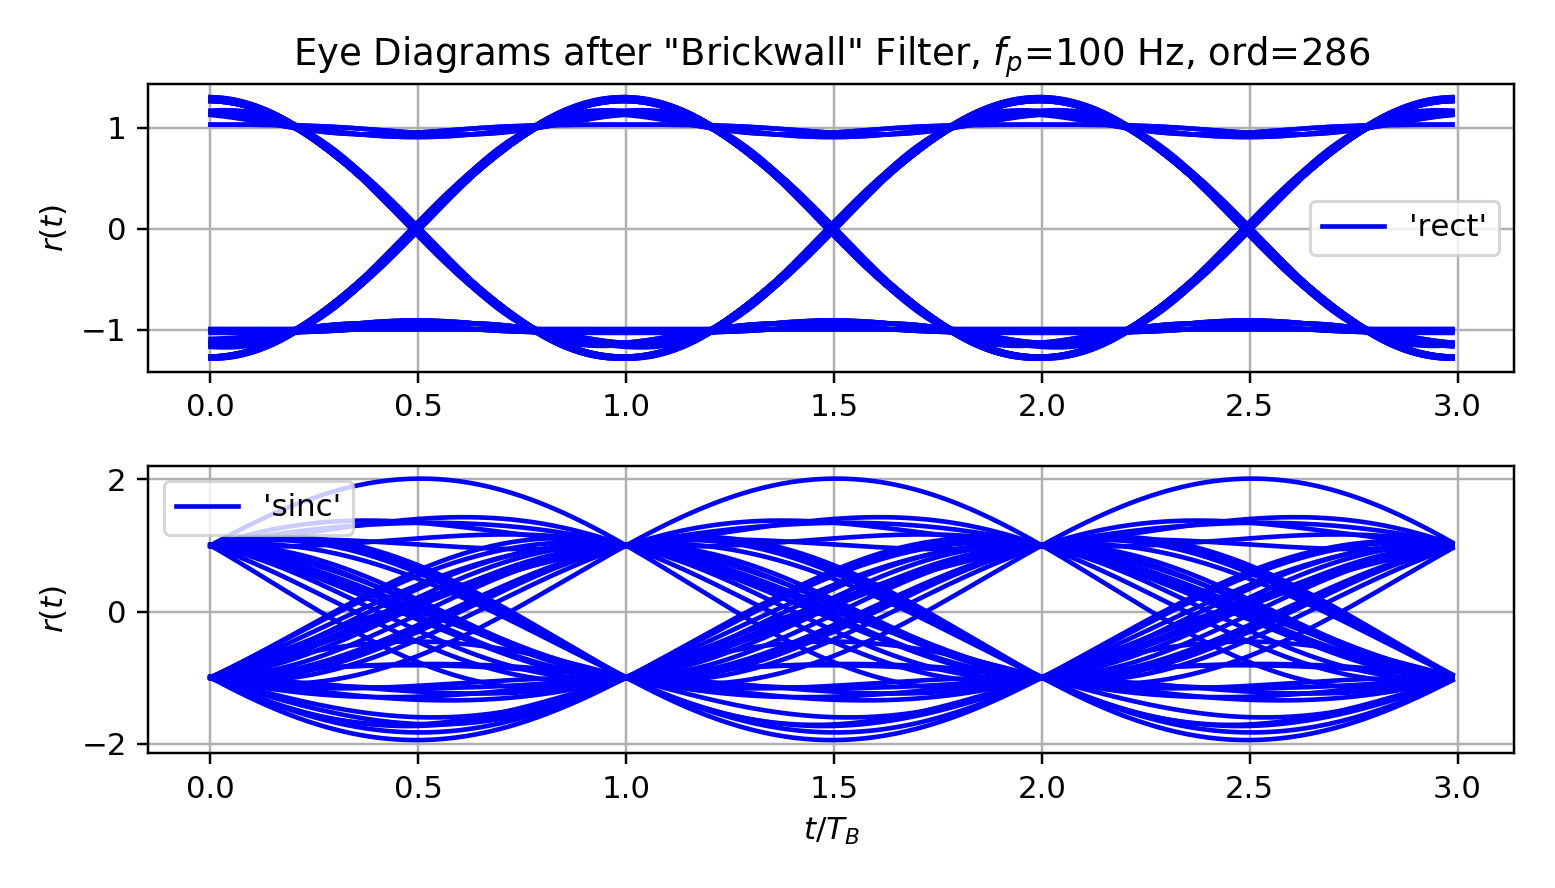

In [28]:
ttArt_bw1s1, Art_bw1s1 = f19.eyediagram(tts, rt_bw1s1, FB)
ttArt_bw1s2, Art_bw1s2 = f19.eyediagram(tts, rt_bw1s2, FB)
plt.figure(51, figsize=fsz)
plt.subplot(211)
plt.plot(ttArt_bw1s1, Art_bw1s1[0], '-b', label="'rect'")
for i in range(1,Art_bw1s1.shape[0]):
    plt.plot(ttArt_bw1s1, Art_bw1s1[i], '-b')
strt51 = 'Eye Diagrams after "Brickwall" Filter'
strt51 = strt51 + ', $f_p$={} Hz, ord={}'.format(fp1, ord_bw1)
plt.title(strt51)
plt.ylabel('$r(t)$')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(ttArt_bw1s2, Art_bw1s2[0], '-b', label="'sinc'")
for i in range(1,Art_bw1s2.shape[0]):
    plt.plot(ttArt_bw1s2, Art_bw1s2[i], '-b')
plt.ylabel('$r(t)$')
plt.xlabel('$t/T_B$')
plt.legend()
plt.grid()
plt.tight_layout()

<IPython.core.display.Javascript object>


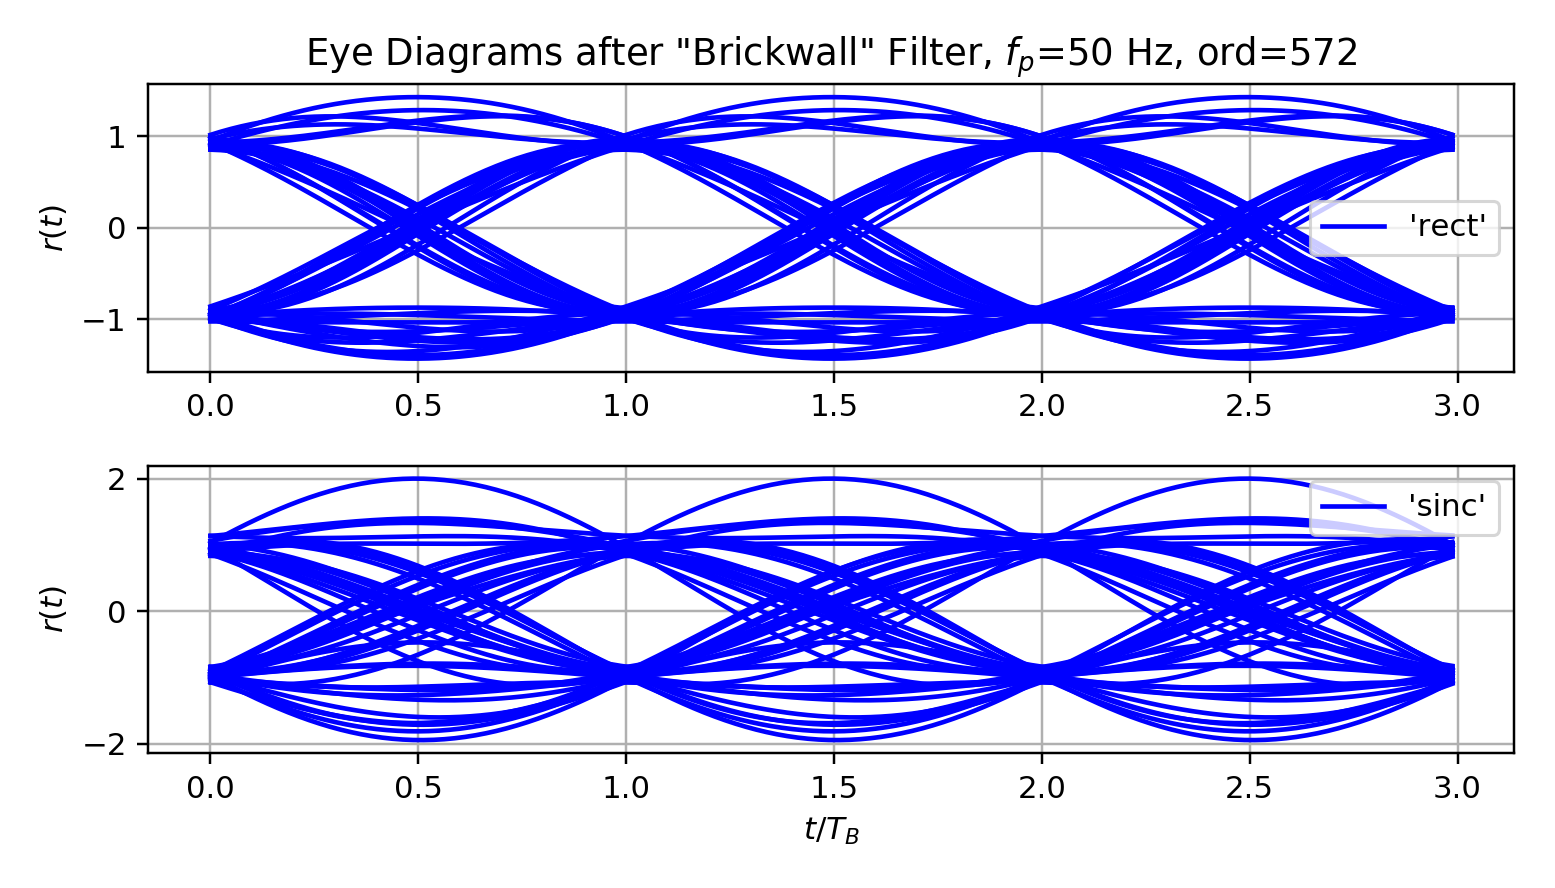

In [29]:
ttArt_bw2s1, Art_bw2s1 = f19.eyediagram(tts, rt_bw2s1, FB)
ttArt_bw2s2, Art_bw2s2 = f19.eyediagram(tts, rt_bw2s2, FB)
plt.figure(55, figsize=fsz)
plt.subplot(211)
plt.plot(ttArt_bw2s1, Art_bw2s1[0], '-b', label="'rect'")
for i in range(1,Art_bw2s1.shape[0]):
    plt.plot(ttArt_bw2s1, Art_bw2s1[i], '-b')
strt55 = 'Eye Diagrams after "Brickwall" Filter'
strt55 = strt55 + ', $f_p$={} Hz, ord={}'.format(fp2, ord_bw2)
plt.title(strt55)
plt.ylabel('$r(t)$')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(ttArt_bw2s2, Art_bw2s2[0], '-b', label="'sinc'")
for i in range(1,Art_bw2s2.shape[0]):
    plt.plot(ttArt_bw2s2, Art_bw2s2[i], '-b')
plt.ylabel('$r(t)$')
plt.xlabel('$t/T_B$')
plt.legend()
plt.grid()
plt.tight_layout()